## Statistiche Analyse - Zusammenhang zwischen Dauer und Belibtheit eines Liedes auf Spotify


 Giacomo Fresi ( Matrikelnummer : 01114135213)


## Hintergrund 

Um meinen statistischen Test durchzuführen, habe ich einen Datensatz von Kaggle genutzt, der die Informationen zu den 2000 am meisten gehörten Songs auf Spotify im Jahr 2019 enthält.

(Quelle : https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset ,Diese Daten werden aus der Spotify-Playlist - Top 2000s von PlaylistMachinery (@plamere) extrahiert; License : CC0, Public Domain) 

Die Daten enthalten ungefähr 15 Spalten, die jeweils das Lied und seine Eigenschaften beschreiben.

Die Daten enthalten Informationen aus den Metadaten von spotify zu den Song-Eigenschaften wie z.B. Tanzbarkeit,Tempo,Mood usw...
Die Beschreibung der einzelnen Eigenschaften wird unten ausführlich angegeben:

* Index : ID
* Title : Name des Liedes
* Artist : Name des Künstlers
* Top Genre : Genre des Liedes
* Year :  Erscheinungsjahr des Liedes
* Beats per Minute (BPM): Das Tempo des Songs
* Energy: Die Energie eines Liedes - je höher der Wert, desto energischer ist das Lied
* Danceability: Je höher der Wert, desto tanzbarer ist das Lied
* Duration : Die Dauer des Songs
* Popularity : Je höher der Wert, desto beliebter ist das Lied. 
   *  Es gibt noch weitere Eigenschaften, aber ich habe mich von Anfang an entschieden, sie in meiner statistischen Forschung nicht zu berücksichtigen.


## Fragestellung / Hypothese

Die Hypothese H1, die ich belegen versucht habe, besagt Folgendes:

* Songs, die über 4 Minuten dauern, sind auf Spotify beliebter als die, die weniger dauern.

Also in Gegenteil dazu ,die Nullhypothese H0 besagt dass die Länge mit der Belibtheit eines Songs nicht zusammenhängt.

Folgende Merkmale habe ich also bei meiner statistisschen Analyse berücksicgtigt:
* Title
* Duration
* Popularity

Das erste Problem in meinem Datensatz war, dass die Songs in der Playlist zufällig platziert wurden und keine Reihenfolge hatten.
Deshalb habe ich die "Rang" Funktion der Pandas-Library verwendet, um die Songs nach "Popularity" zu klassifizieren und so eine neue "Rank_by_popularity" Spalte zu erstellen, nach der meine Daten in absteigender Rehienfolge (vom höchsten zum niedrigsten) platziert wurden.



In [3]:
import pandas as pd
import seaborn as sns
import scipy.stats

Nachdem ich meine Daten importiert und klassifiziert hatte, berücksichtigte ich nur die Spalten, die ich benötigte, nämlich Title, Duration und Popularity.


In [4]:
songs = pd.read_csv("Spotify_copia.csv",error_bad_lines=False)
songs["Rank_by_Popularity"] = songs["Popularity"].rank(ascending = False)
songs = songs.sort_values("Popularity", ascending=False)
songs = songs[["Popularity","Title","Duration" ]].head(500)
songs


b'Skipping line 844: expected 15 fields, saw 16\nSkipping line 906: expected 15 fields, saw 16\nSkipping line 953: expected 15 fields, saw 16\nSkipping line 1984: expected 15 fields, saw 16\n'


,Popularity,Title,Duration
793,100,Dance Monkey,209
787,98,Memories,189
786,95,bad guy,194
1638,95,All I Want for Christmas Is You,241
726,88,Shallow,216
...,...,...,...
1548,71,Learning To Fly,242
376,71,Trouble,273
27,71,Cleanin' Out My Closet,298
1174,71,Keep on Loving You,200


Ein weiteres Problem mit meinem Datensatz war, dass die Werte in der Duration-Spalte Strings und nicht Floats waren.
Also habe ich eine for-Schleife verwendet, um die Strings-Werte durch Floats zu ersetzen, damit die statistische Hypothese durchgeführt werden könnte.

In [5]:
LenghtClean = []

for X in songs["Duration"]:
    LenghtClean.append(float(X))
   

songs["Duration"] = LenghtClean
    



In [6]:
songs.describe()

,Popularity,Duration
count,500.000000,500.000000
mean,76.122000,250.946000
std,4.219802,64.397742
min,71.000000,125.000000
25%,73.000000,210.750000
50%,75.000000,245.000000
75%,78.000000,279.250000
max,100.000000,559.000000


Daher sehen wir, dass die durchschnittliche Dauer 250 Sekunden beträgt, 10 Sekunden mehr als die 4 Minuten meiner Hypothese.
Ich habe in meinem Datensatz eine neue Spalte mit dem Namen "Song_length" erstellt, um die Dauer der Songs in zwei Klassen zu unterteilen:
einerseits diejenigen, die vier Minuten oder länger dauern, andererseits diejenigen, die weniger als vier Minuten dauern.


In [7]:
songs["Song_Length"] = songs.Duration.apply(
    lambda Song_Length: "four_or_more" if Song_Length >= 240 else "four_or_less"
)

In [8]:
songs.groupby(["Song_Length"]).size()

Song_Length
four_or_less    224
four_or_more    276
dtype: int64

In [9]:
songs

,Popularity,Title,Duration,Song_Length
793,100,Dance Monkey,209.0,four_or_less
787,98,Memories,189.0,four_or_less
786,95,bad guy,194.0,four_or_less
1638,95,All I Want for Christmas Is You,241.0,four_or_more
726,88,Shallow,216.0,four_or_less
...,...,...,...,...
1548,71,Learning To Fly,242.0,four_or_more
376,71,Trouble,273.0,four_or_more
27,71,Cleanin' Out My Closet,298.0,four_or_more
1174,71,Keep on Loving You,200.0,four_or_less


## Visualisierung 1 
### Strip Plot


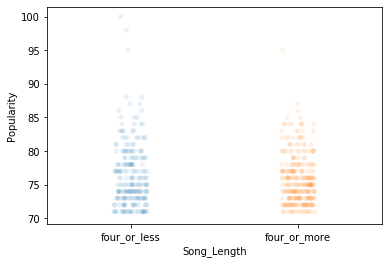

In [10]:
sns.stripplot(data=songs, y="Popularity", x="Song_Length",alpha = 0.1)

Die erste grafische Darstellung zeigt keine offensichtlichen Unterschiede zwischen den beiden Klassen.
Es scheint daher die Nullhypothese zu belegen, die besagt, dass die Länge eines Songs keinen Einfluss auf seine Belibtheit hat.
Beide Klassen konzentrieren sich in einem Popularity-bereich ,der zwischen 70 und 90 liegt.
Im Gegenteil, das Plot der kürzeren Songs scheint in Bezug auf die Popularität der Songs eher nach oben zu tendieren.



## Visualisierung 2
### Lineare Regression

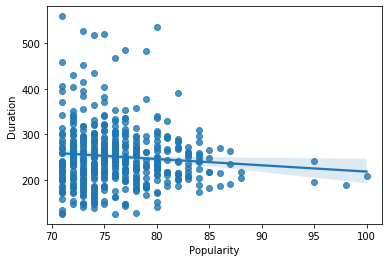

In [11]:
%matplotlib inline
px = sns.regplot(x=songs.Popularity , y = songs.Duration)



In [12]:
scipy.stats.linregress(x=songs.Duration, y=songs.Popularity)

#Die Absteigerung ist leicht negativ.

LinregressResult(slope=-0.005938813175671472, intercept=77.61232141118205, rvalue=-0.09063130333575163, pvalue=0.0427980264871792, stderr=0.0029242583994931975)

Auch in diesem Fall die grafische Darstellung scheint meine alternative Hypothese zu widerlegen.
Die verwendete Grafik dient dazu,die lineare Regression zwischen Duration und Popularity eines Songs zu belegen, die in diesem Fall aber nicht zu sehen ist,die Korrelation zwischen die Werte scheint negativ zu sein.
Ich habe versucht grafisch eine Verbindung zwischen den Werten darzustellen,jedoch hat es nicht funktioniert,weil kein klares Muster zu erkennen ist,da die Daten zu verstreut.




## Statistische Tests und Interpretation der Ergebnisse

In [13]:
Popularity_long = songs[songs.Song_Length == "four_or_more"] ["Popularity"]
Popularity_short = songs[songs.Song_Length == "four_or_less"] ["Popularity"]

scipy.stats.ttest_ind(Popularity_long, Popularity_short)

Ttest_indResult(statistic=-1.4651852167313877, pvalue=0.14350142846029965)

Durch den T-Test habe ich herausgefunden,dass der pvalue Wert über den Signifikanzniveau(a=0.05) liegt und somit die Nullhypothese angenommen wird,dass heißt,dass die Popularität der Songs keinen Zusammenhang mit der Dauer der Songs zu tun hat.

In [15]:
scipy.stats.pearsonr(songs.Duration,songs.Popularity)

(-0.09063130333575145, 0.0427980264871675)

Auch der Korrelationskoeffizient r von Bravais-Pearson , der neben 0,1 liegt, beweist die Richtigkeit der NullHypothese.

Zusammenfassend ist daher klar, dass meine H1 Hypothese falsch und die Nullhypothese H0 richtig war.
Es scheint keinen Hinweis auf eine Korrelation zwischen der Länge eines Songs und seiner Popularität zu geben.